In [6]:
import sys
sys.path.append('../')

In [7]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier
from main import RY_ansatz, Rot_ansatz, ZGR_ansatz

In [8]:
num_qubits = 6

In [9]:
def init_state():
    #qml.AmplitudeEmbedding(features=vecs[:,0], wires=range(num_qubits))
    pass 

In [10]:
num_layers = 8
#var_state_class = ZGR_ansatz(num_qubits, num_layers)
var_state_class = Rot_ansatz(num_qubits,num_layers)
var_state_class = RY_ansatz(num_qubits,num_layers)
var_state = var_state_class.construct_circuit
num_params = var_state_class.num_params


(<Figure size 5300x700 with 1 Axes>, <Axes: >)

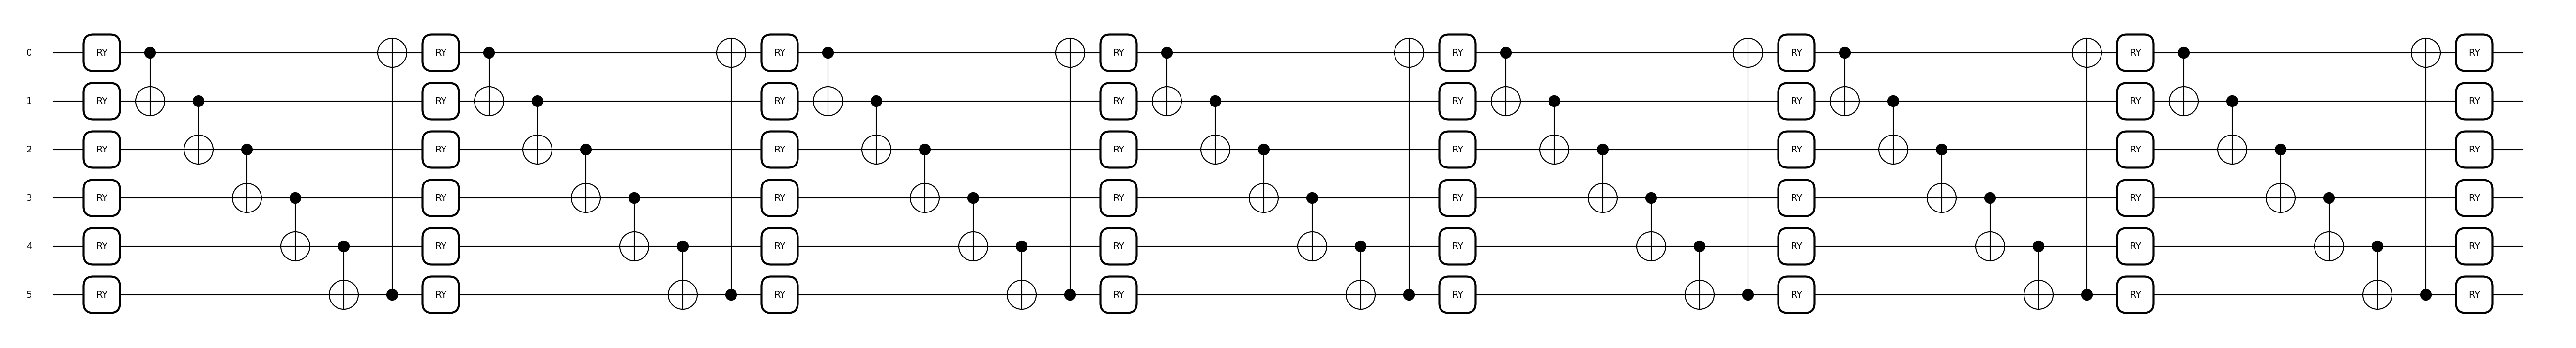

In [11]:
qml.draw_mpl( var_state )( num_params*[0] )

In [12]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : x**2/2,
                    lambda p : p**2/2,
                    device,
                    var_state  = var_state,
                    init_state = init_state,
                    #semi_classical=True
                    )

In [13]:
vals, vecs = varqft.energy_eigens()
val = vals[0]
vec = vecs[:,0]
val2 = vals[1]
vec2 = vecs[:,1] 
vals

array([  0.5       ,   1.5       ,   2.49999996,   3.50000062,
         4.49999279,   5.50005422,   6.49960958,   7.50176601,
         8.49104199,   9.52460606,  10.40897187,  11.65966708,
        12.19033234,  14.06633699,  14.27534256,  16.85007412,
        16.93707916,  20.03636287,  20.08118725,  23.62300147,
        23.64987422,  27.60475159,  27.62234873,  31.97770068,
        31.98977126,  36.73925908,  36.7476677 ,  41.88772206,
        41.89348811,  47.42194562,  47.42565755,  53.34114427,
        53.343145  ,  59.64476764,  59.64524396,  66.33145075,
        66.33242445,  73.40139218,  73.40383525,  80.85477928,
        80.85880311,  88.69137521,  88.6971966 ,  96.91096945,
        96.91894254, 105.51335235, 105.52402866, 114.49828231,
       114.51252013, 123.8654316 , 123.88460138, 133.61427884,
       133.64067271, 143.74386078, 143.78158468, 154.25210418,
       154.30927681, 165.13363443, 165.22886929, 176.37045492,
       176.557429  , 187.97084335, 188.2859242 , 201.39

In [15]:
params_init = np.random.randn( num_params )*0.01

params_ground, energies_ground = varqft.run( params_init, max_iterations=500, learning_rate=0.1 )

Step = 0,  Energy = 71.41439819
Step = 5,  Energy = 33.86412811
Step = 10,  Energy = 24.14175797
Step = 15,  Energy = 16.45207024
Step = 20,  Energy = 11.89874268
Step = 25,  Energy = 7.68330908
Step = 30,  Energy = 6.24633026
Step = 35,  Energy = 4.88745403
Step = 40,  Energy = 4.28973579
Step = 45,  Energy = 3.01623082
Step = 50,  Energy = 2.41513586
Step = 55,  Energy = 1.88062286
Step = 60,  Energy = 1.63430190
Step = 65,  Energy = 1.54948246
Step = 70,  Energy = 1.46210742


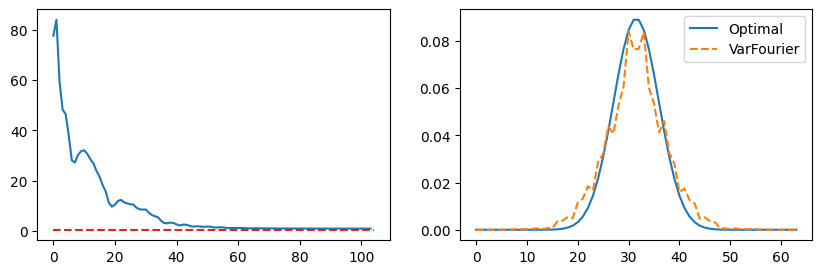

In [22]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vec)**2) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [25]:
abs(np.vdot( ground_state, vec ))**2

0.9882546626729468

In [26]:
params_ground[-1]

Array([-3.7544064e-02, -4.5399517e-03,  5.9913345e-02, -1.9128956e-03,
       -1.0661238e-01,  2.9743872e+00, -2.9385910e+00,  8.7972802e-01,
       -6.8608248e-01, -8.6394769e-01,  7.4817753e-01, -1.9150093e+00,
       -3.3809891e-01, -1.1861026e+00,  3.3815506e+00], dtype=float32)

In [27]:
varqft = VarFourier( num_qubits, 
                    lambda x : x**2/2, 
                    lambda p : p**2/2, 
                    device, 
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = 25, 
                    orthoparams= np.copy(params_ground[-1]) 
                    ) 

In [28]:
params_init = np.random.randn( num_params )

params_excited, energies_excited = varqft.run( params_init )

Step = 0,  Energy = 13.49230766
Step = 5,  Energy = 9.89497948
Step = 10,  Energy = 16.64193916
Step = 15,  Energy = 22.12989807
Step = 20,  Energy = 22.56686211
Step = 25,  Energy = 24.21750832
Step = 30,  Energy = 23.27758789
Step = 35,  Energy = 24.24650764
Step = 40,  Energy = 24.21933937
Step = 45,  Energy = 24.30394173
Step = 50,  Energy = 24.89081001


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f9c19021610>>
Traceback (most recent call last):
  File "/home/ctabares/.virtualenvs/qhack/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Step = 55,  Energy = 25.13106918
Step = 60,  Energy = 25.19978714
Step = 65,  Energy = 25.17152977
Step = 70,  Energy = 25.27836990
Step = 75,  Energy = 25.26424026


In [ ]:
val

0.5000000011276773

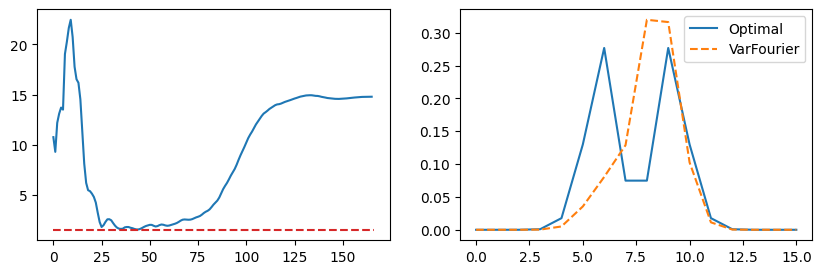

In [ ]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited )
ax[0].hlines( val2, 0, len(energies_excited), colors='tab:red', linestyles='--' ) 

excited_state = varqft.state( params_excited[-1] )

ax[1].plot( np.abs(vec2)**2) 
ax[1].plot( np.abs(excited_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [ ]:
abs(np.vdot( ground_state, vec ))**2

0.9986812091036101

In [ ]:
abs(np.vdot( ground_state, excited_state ))**2 

1.4419090490491726e-06

In [ ]:
abs(np.vdot( excited_state, vec2 ))**2

0.9999787126249132